In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('C:\\Users\\Himanshu\\Downloads\\MARUTI.csv')
df1 = df1[df1.Series == 'EQ']

In [3]:
returns = df1['Close Price'].pct_change()*100
daily_return_avg = returns.mean()
daily_return_std = returns.std()

In [4]:
annual_return = 252*daily_return_avg
volatility = np.sqrt(252)*daily_return_std

In [5]:
df2 = pd.read_csv('C:\\Users\\Himanshu\\Downloads\\CENTURYPLY.csv')
df3 = pd.read_csv('C:\\Users\\Himanshu\\Downloads\\JETAIRWAYS.csv')
df4 = pd.read_csv('C:\\Users\\Himanshu\\Downloads\\HINDUNILVR.csv')
df5 = pd.read_csv('C:\\Users\\Himanshu\\Downloads\\BAJFINANCE.csv')
df6 = pd.read_csv('C:\\Users\\Himanshu\\Downloads\\VOLTAS.csv')

df2 = df2[df2.Series == 'EQ']
df3 = df3[df3.Series == 'EQ']
df4 = df4[df4.Series == 'EQ']
df5 = df5[df5.Series == 'EQ']
df6 = df6[df6.Series == 'EQ']

In [6]:
df2 = df2.reset_index()
df3 = df3.reset_index()
df4 = df4.reset_index()
df5 = df5.reset_index()
df6 = df6.reset_index()

In [7]:
df7 = pd.concat([df2['Close Price'], df3['Close Price'], df4['Close Price'], df5['Close Price'], df6['Close Price']], axis =1, keys=['Century', 'Jet','Hindus','Bajaj','Voltas'])

In [8]:
df7.head()

,Century,Jet,Hindus,Bajaj,Voltas
0,266.65,527.50,983.25,1332.95,431.85
1,266.10,534.15,1000.40,1347.75,432.45
2,264.85,528.90,1009.40,1324.80,430.20
3,260.35,522.70,990.25,1314.55,414.10
4,254.05,520.40,1008.00,1289.15,415.75


In [9]:
returns_new = df7.pct_change()

In [10]:
cov_matrix_annual = returns_new.cov() * 252
cov_matrix_annual

,Century,Jet,Hindus,Bajaj,Voltas
Century,0.140827,0.053165,0.005474,0.031163,0.034539
Jet,0.053165,0.390442,0.008858,0.044382,0.043243
Hindus,0.005474,0.008858,0.037652,0.011735,0.012599
Bajaj,0.031163,0.044382,0.011735,0.103079,0.034878
Voltas,0.034539,0.043243,0.012599,0.034878,0.095078


In [66]:
weights = np.array([0.2,0.2,0.2,0.2,0.2])
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual, weights))
port_variance

0.053085903134253515

In [12]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.23040378281237814

In [13]:
portfolio_simple_annual_return = np.sum(returns_new.mean()*weights) *252
portfolio_simple_annual_return

0.05627665195642344

In [14]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolio_simple_annual_return, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 6.0%
Annual volatility/standard deviation/risk : 23.0%
Annual variance : 5.0%


In [74]:
df7.sort_index(inplace=True)

In [75]:
returns = df7.pct_change()

In [73]:
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [40]:
stocks = ['Century', 'Jet', 'Hindus', 'Bajaj', 'Voltas']

In [76]:
num_portfolios = 25000

In [77]:
results = np.zeros((4+len(stocks)-1,num_portfolios))

In [80]:
for i in range(num_portfolios):
    weights = np.array(np.random.random(5))
    weights /= np.sum(weights)

In [81]:
portfolio_return = np.sum(mean_daily_returns * weights) * 252
portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)

In [82]:
results[0,i] = portfolio_return
results[1,i] = portfolio_std_dev
results[2,i] = results[0,i] / results[1,i]
for j in range(len(weights)):
    results[j+3,i] = weights[j]

In [84]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])

In [85]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

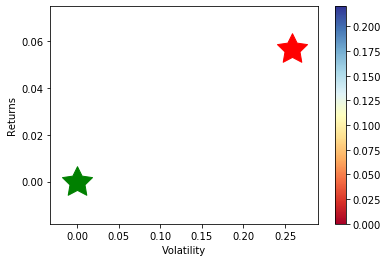

In [86]:
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [87]:
print(max_sharpe_port)

ret        0.056879
stdev      0.258114
sharpe     0.220363
Century    0.228698
Jet        0.196524
Hindus     0.016884
Bajaj      0.309460
Voltas     0.248435
Name: 24999, dtype: float64


In [88]:
print(min_vol_port)

ret        0.0
stdev      0.0
sharpe     0.0
Century    0.0
Jet        0.0
Hindus     0.0
Bajaj      0.0
Voltas     0.0
Name: 0, dtype: float64
